# Demo on Hashing 

In [1]:
import numpy as np
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
# Reading multiple images from a folder
folder = "./YALE"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)

In [3]:
# Vectorizing the images and storing it in a list
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Making it a unit vector
    image_vector.append(img_vec_norm)

## Locality Sensitive Hashing – Random Projections

In [4]:
def genRandomHashVectors(m, length):  # Generate random unit vectors for Hashing
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector    

In [5]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code   

In [6]:
hash_vector = genRandomHashVectors(15,len(image_vector[0]))

In [7]:
localSensitiveHashing(hash_vector,image_vector[0])

['1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1']

In [8]:
# Creating a Image Dictionary using the hash as the keys
image_dict = {}
for i in range(len(image_vector)):
    hash_code = localSensitiveHashing(hash_vector,image_vector[i])
    str_hash_code = ''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i)
image_dict        

{'110011010000111': [0,
  2,
  4,
  5,
  8,
  10,
  17,
  26,
  27,
  29,
  75,
  99,
  100,
  101,
  102,
  104,
  107,
  116,
  121],
 '110011010000011': [1,
  6,
  7,
  23,
  24,
  30,
  34,
  35,
  38,
  40,
  41,
  42,
  70,
  71,
  108,
  109,
  136,
  139,
  153],
 '100011010000110': [3, 58],
 '110011010010011': [9,
  13,
  19,
  21,
  46,
  51,
  52,
  53,
  66,
  74,
  79,
  84,
  85,
  86,
  87,
  95,
  98,
  122,
  127,
  128,
  129,
  133,
  134,
  140,
  141,
  142,
  143,
  149,
  152],
 '110011010010111': [11,
  12,
  15,
  16,
  18,
  20,
  31,
  57,
  59,
  60,
  65,
  68,
  92,
  93,
  132,
  137,
  156,
  162,
  164],
 '100011010000111': [14, 157],
 '100011010000011': [22, 80, 146],
 '100001010000011': [25],
 '110011010010010': [28,
  45,
  48,
  49,
  54,
  73,
  78,
  82,
  89,
  94,
  96,
  155,
  158,
  160],
 '100011010010011': [32, 47, 135],
 '110011010000010': [33, 37, 81, 161, 163],
 '100010010100111': [36],
 '110011011000010': [39],
 '110011011000011': [43],

In [9]:
# Getting the keys and values of the Dictionary
keys = list(image_dict.keys())
values = list(image_dict.values())

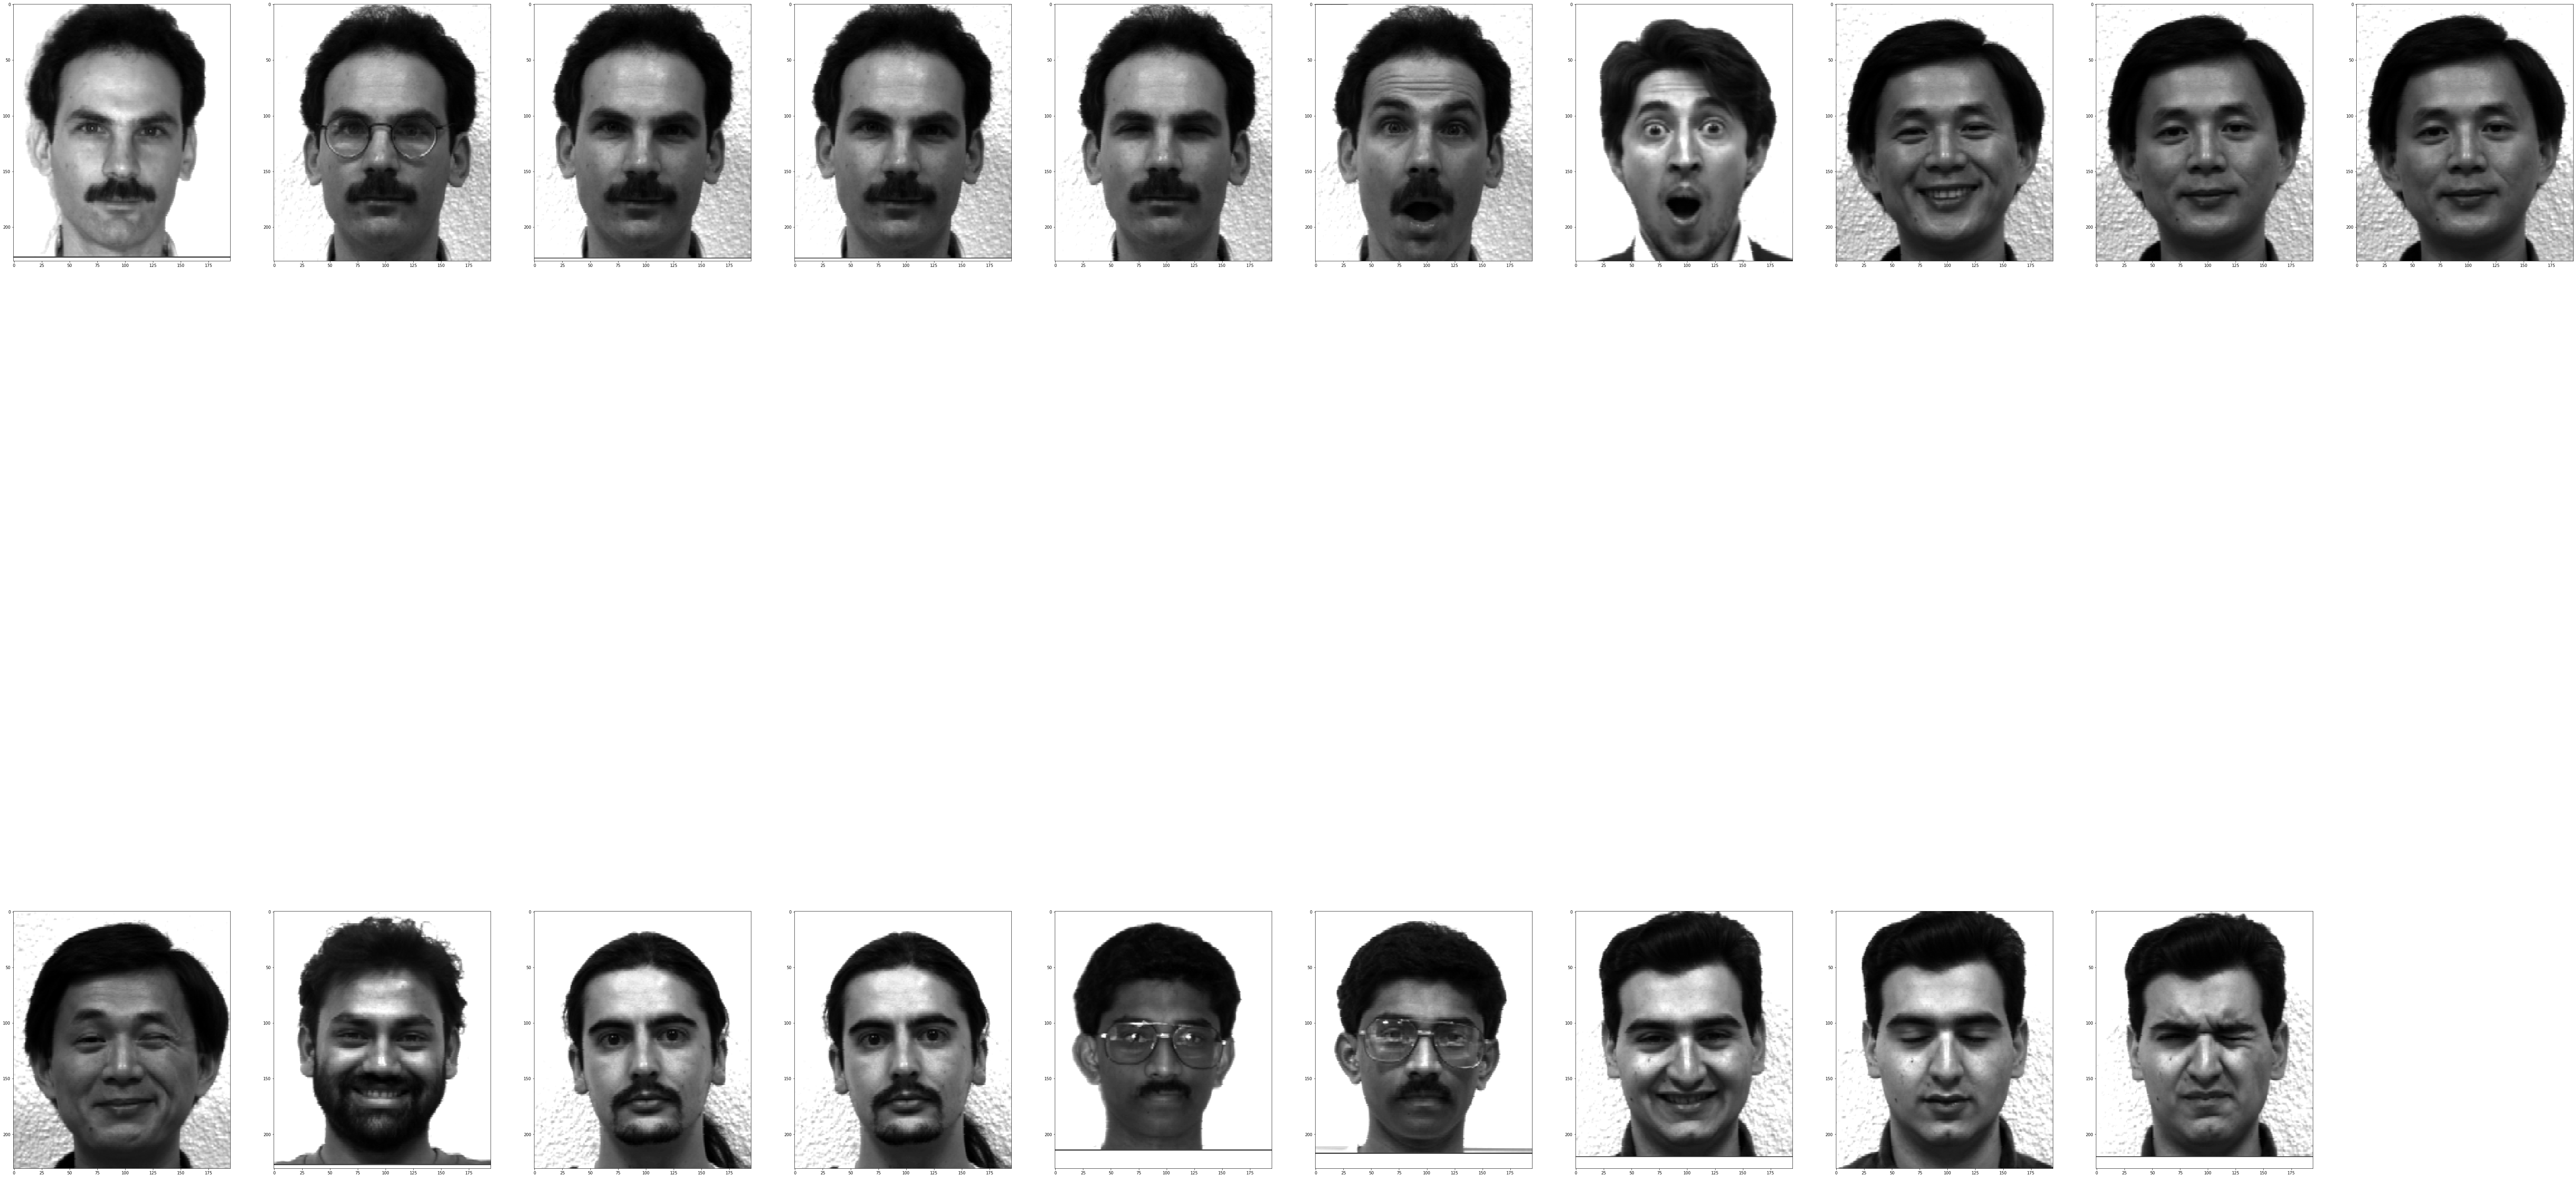

In [10]:
# Plotting images with same hash code
imgs = [images[i] for i in range(len(images)) if i in values[4]]
fig = plt.figure()
cols = 2
n_images = len(imgs)
for n,image in zip(range(n_images),imgs):
    ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
    plt.gray()
    plt.imshow(image)
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

## Hashing with Hierarchical Structures

In [11]:
# Class for Defining Node of a Tree
class Node:
    def __init__(self):
        self.m_NodeIndex = -1
        self.m_NodeDepth = -1
        self.m_ParentIndex = -1
        self.m_LeftChildIndex = -1
        self.m_RightChildIndex = -1
        self.m_IsDecisionNode = None
        self.m_HashVector = None
    def setNode(self,nodeIndex,nodeDepth,parentIndex):
        self.m_NodeIndex = nodeIndex
        self.m_NodeDepth = nodeDepth
        self.m_ParentIndex = parentIndex

In [12]:
class HashTree:
    def __init__(self,bit):
        self.m_Depth = bit
        self.m_CurrentNodeNum = 0
        self.m_NodeArray = [Node() for _ in range(2**(bit+1)-1)]
    
    def fit(self,dataLength):
        self.m_NodeArray[0].setNode(0,0,-1)   #Root Node
        self.m_CurrentNodeNum += 1
        
        for nodeCount in range(len(self.m_NodeArray)):
            
            if (self.m_NodeArray[nodeCount].m_NodeIndex == nodeCount and 
                self.m_NodeArray[nodeCount].m_LeftChildIndex == -1 and 
                self.m_NodeArray[nodeCount].m_RightChildIndex == -1 and 
                self.m_NodeArray[nodeCount].m_NodeDepth >= 0):
                 
                
                if self.m_NodeArray[nodeCount].m_NodeDepth != self.m_Depth:
                    self.m_NodeArray[nodeCount].m_IsDecisionNode = True
                    randomVector = np.random.uniform(-1,1,dataLength)
                    self.m_NodeArray[nodeCount].m_HashVector = randomVector / np.linalg.norm(randomVector)
                    
                    lci = self.m_CurrentNodeNum
                    rci = self.m_CurrentNodeNum + 1
                    
                    self.m_NodeArray[nodeCount].m_LeftChildIndex = lci 
                    self.m_NodeArray[nodeCount].m_RightChildIndex = rci 

                    self.m_NodeArray[lci].setNode(lci,self.m_NodeArray[nodeCount].m_NodeDepth+1,
                            self.m_NodeArray[nodeCount].m_NodeIndex)

                    self.m_NodeArray[rci].setNode(rci,self.m_NodeArray[nodeCount].m_NodeDepth+1,
                            self.m_NodeArray[nodeCount].m_NodeIndex)
                    
                    self.m_CurrentNodeNum += 2
                else:
                    self.m_NodeArray[nodeCount].m_IsDecisionNode = False
            else:
                print("Hash Tree Created!!!!!!!!!!!")
                break
    
    def getHashCode(self,data):
        hash_code = []
        nodeCount = 0
        while nodeCount < len(self.m_NodeArray):
            if self.m_NodeArray[nodeCount].m_IsDecisionNode == True:
        
                if np.dot(data,self.m_NodeArray[nodeCount].m_HashVector) > 0:
                    hash_code.append('1')
                    nodeCount = self.m_NodeArray[nodeCount].m_RightChildIndex
                    
                else:
                    hash_code.append('0')
                    nodeCount = self.m_NodeArray[nodeCount].m_LeftChildIndex
            else:
                break
                    
        str_hash_code = ''.join(hash_code)
        return str_hash_code

In [13]:
image_dict = {}
hash_tree = HashTree(12)
hash_tree.fit(len(image_vector[0]))

for i in range(len(image_vector)):
    hash_code = hash_tree.getHashCode(image_vector[i])
    str_hash_code = ''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i)
image_dict

{'001000111111': [0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  10,
  12,
  13,
  14,
  18,
  20,
  21,
  23,
  24,
  26,
  27,
  29,
  30,
  31,
  43,
  44,
  46,
  47,
  48,
  54,
  56,
  59,
  60,
  62,
  65,
  68,
  70,
  71,
  74,
  77,
  84,
  87,
  95,
  100,
  101,
  102,
  103,
  104,
  106,
  111,
  114,
  118,
  120,
  121,
  128,
  130,
  133,
  134,
  137,
  139,
  141,
  142,
  146,
  149,
  154,
  159,
  164],
 '001000110011': [6, 67, 138, 160],
 '100111011111': [9,
  22,
  34,
  37,
  38,
  40,
  66,
  76,
  89,
  92,
  93,
  94,
  96,
  108,
  122,
  136,
  140,
  145,
  148,
  150,
  152],
 '001000110001': [11, 17, 55, 57, 73, 156],
 '001000110110': [15, 16, 45, 49, 53, 61, 112, 125, 126],
 '001000110111': [19, 78, 82],
 '100111011101': [25, 75, 151, 153],
 '011010111110': [28],
 '001000101101': [32, 113, 135],
 '100110001000': [33, 35, 41, 42, 91, 99, 109, 127, 144, 147],
 '001000111000': [36, 58, 63, 79, 80, 81, 85, 86, 98, 123, 124, 129, 131],
 '001011010110': [39],
 '00

In [14]:
keys = list(image_dict.keys())
values = list(image_dict.values())

In [15]:
imgs = [images[i] for i in range(len(images)) if i in values[0]]
fig = plt.figure()
cols = 2
n_images = len(imgs)
for n,image in zip(range(n_images),imgs):
    ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
    plt.gray()
    plt.imshow(image)
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

---
### Query Search in Dictionary

To get the top $k$ images from the dictionary

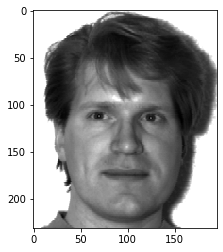

In [16]:
query_image = images[0]
plt.gray()
plt.imshow(query_image)

In [17]:
row,col = np.shape(query_image)
query_vector = query_image.reshape(row*col)
query_vec_norm = query_vector / np.linalg.norm(query_vector)

query_hash_code  = hash_tree.getHashCode(query_vec_norm)
value_index = [i for i in range(len(keys)) if keys[i] == query_hash_code]
value_index

[0]

In [18]:
image_index = values[value_index[0]]

print(image_index)

[0, 1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 18, 20, 21, 23, 24, 26, 27, 29, 30, 31, 43, 44, 46, 47, 48, 54, 56, 59, 60, 62, 65, 68, 70, 71, 74, 77, 84, 87, 95, 100, 101, 102, 103, 104, 106, 111, 114, 118, 120, 121, 128, 130, 133, 134, 137, 139, 141, 142, 146, 149, 154, 159, 164]


In [19]:
k = 5
distance_list = []
for i in image_index:
    d = np.linalg.norm(image_vector[i] - query_vec_norm)
    distance_list.append(d)
sorted_index = np.argsort(distance_list)
print(distance_list)
print(sorted_index)

[0.0, 0.3341284480881243, 0.33632195833479817, 0.4896933867261618, 0.3602453630465329, 0.35101311728772017, 0.3676537884635928, 0.3212891636995582, 0.3374921409270127, 0.4458319811057776, 0.44067641786295664, 0.4917411044786643, 0.44254637598048713, 0.4459089261853413, 0.475491624858124, 0.49189116690449475, 0.4456528532974118, 0.43153030793621405, 0.42975651706675516, 0.4398843959978733, 0.4416231145260031, 0.46544706332922037, 0.48954022712856754, 0.502624838321202, 0.5283705483614706, 0.5848078672388674, 0.5398344126290618, 0.5314887579811274, 0.4293102052996613, 0.4597675369437018, 0.4597675369437018, 0.4279841317139256, 0.4524019783090364, 0.5213501943360046, 0.5197312644927073, 0.5197312644927073, 0.535664254146119, 0.4313991528709954, 0.5225465076268117, 0.48114238153811717, 0.5193839280655925, 0.47032267424439095, 0.45758949761118606, 0.4804555380473821, 0.4552396598613323, 0.454818780322169, 0.45822281355889216, 0.5649265439163356, 0.5970884907699427, 0.5572497500724938, 0.570

In [20]:
sorted_image_index = [image_index[i] for i in sorted_index]
print(sorted_image_index)

[0, 8, 1, 2, 10, 5, 4, 7, 121, 62, 56, 27, 77, 26, 29, 13, 30, 18, 24, 12, 20, 65, 104, 103, 101, 154, 106, 59, 60, 159, 31, 100, 164, 21, 102, 87, 43, 3, 14, 23, 44, 139, 133, 134, 141, 142, 137, 95, 70, 71, 68, 128, 84, 46, 54, 130, 74, 48, 118, 111, 146, 120, 47, 114, 149]


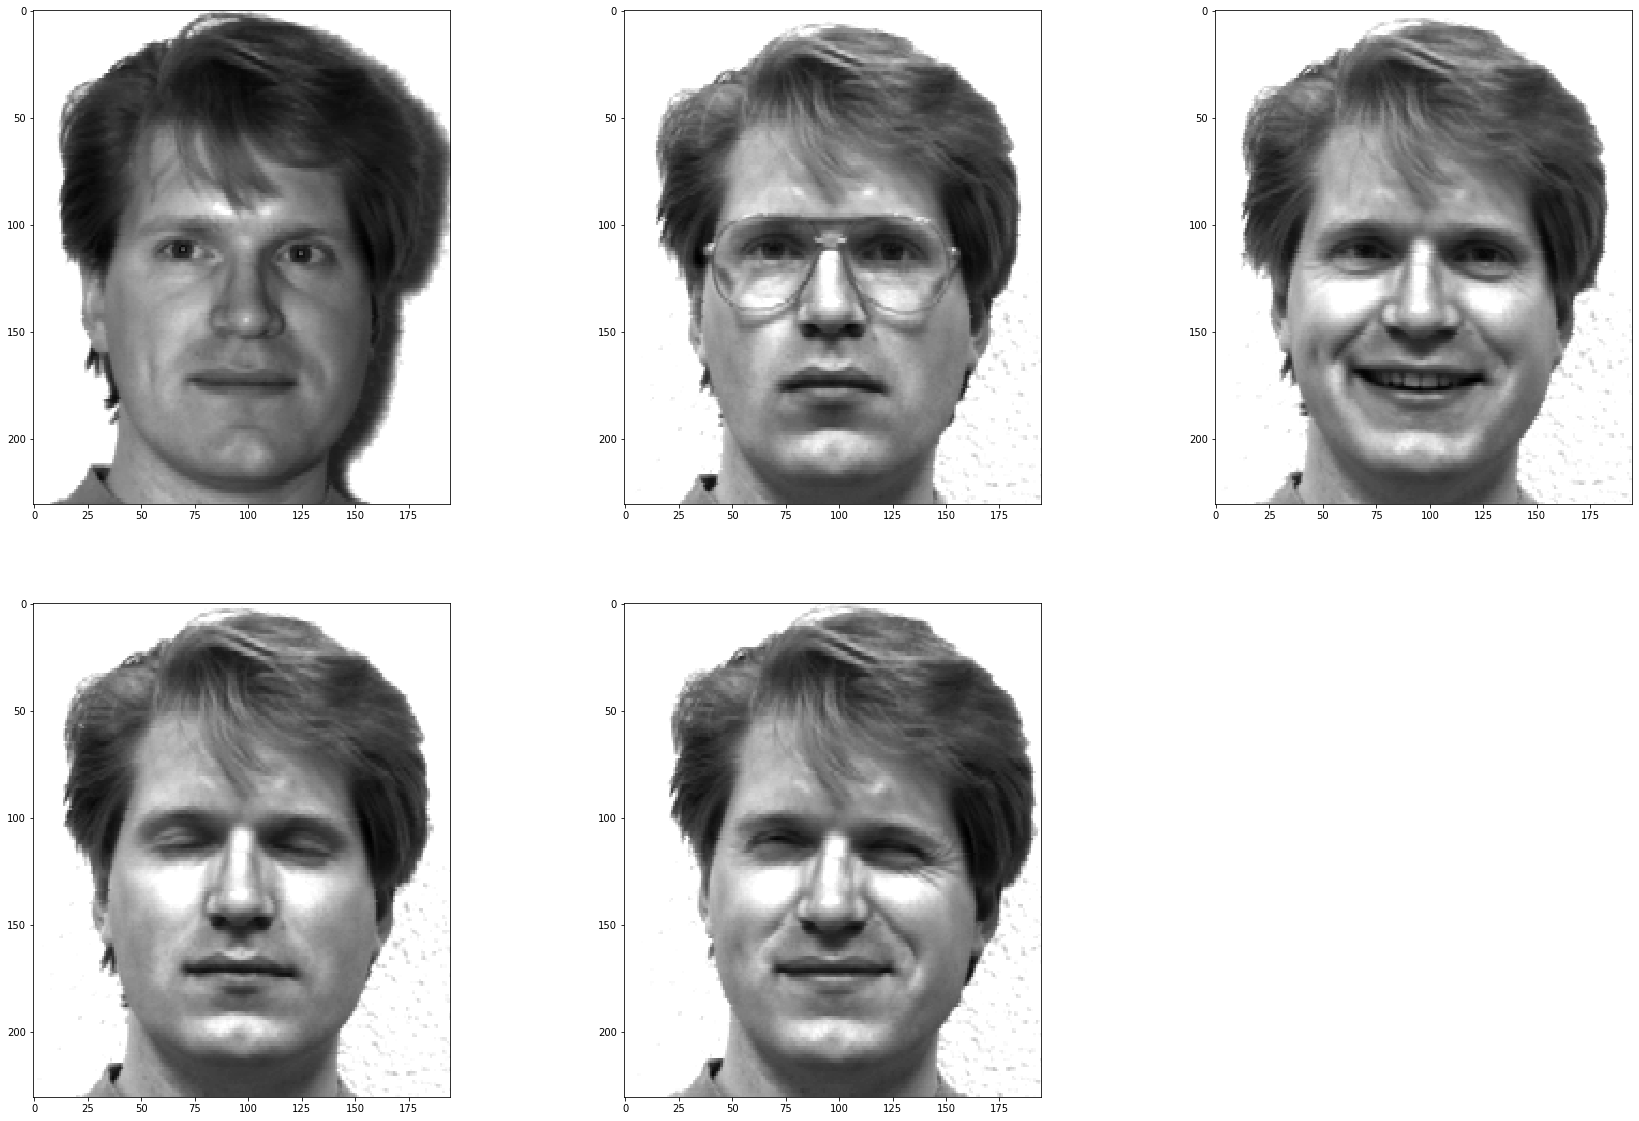

In [21]:
top_k_indices = sorted_image_index[:k]
imgs = [images[i] for i in range(len(images)) if i in top_k_indices]
fig = plt.figure()
cols = 2
n_images = len(imgs)
for n,image in zip(range(n_images),imgs):
    ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
    plt.gray()
    plt.imshow(image)
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

In [22]:
# Summerizing the above concept to a function
def queryHashing(query_image,images,hash_tree,image_dict,k):
    plt.gray()
    plt.title("Query Image")
    plt.imshow(query_image)
    
    keys = list(image_dict.keys())
    values = list(image_dict.values())
    
    row,col = np.shape(query_image)
    query_vector = query_image.reshape(row*col)
    query_vec_norm = query_vector / np.linalg.norm(query_vector)

    query_hash_code  = hash_tree.getHashCode(query_vec_norm)
    value_index = [i for i in range(len(keys)) if keys[i] == query_hash_code]
    image_index = values[value_index[0]]
    
    distance_list = []
    for i in image_index:
        d = np.linalg.norm(image_vector[i] - query_vec_norm)
        distance_list.append(d)
    sorted_index = np.argsort(distance_list)
    sorted_image_index = [image_index[i] for i in sorted_index]
    top_k_indices = sorted_image_index[:k]
    
    imgs = [images[i] for i in range(len(images)) if i in top_k_indices]
    fig = plt.figure()
    cols = 2
    n_images = len(imgs)
    for n,image in zip(range(n_images),imgs):
        ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

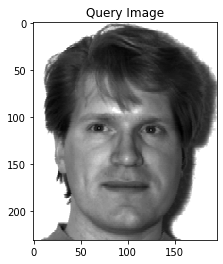

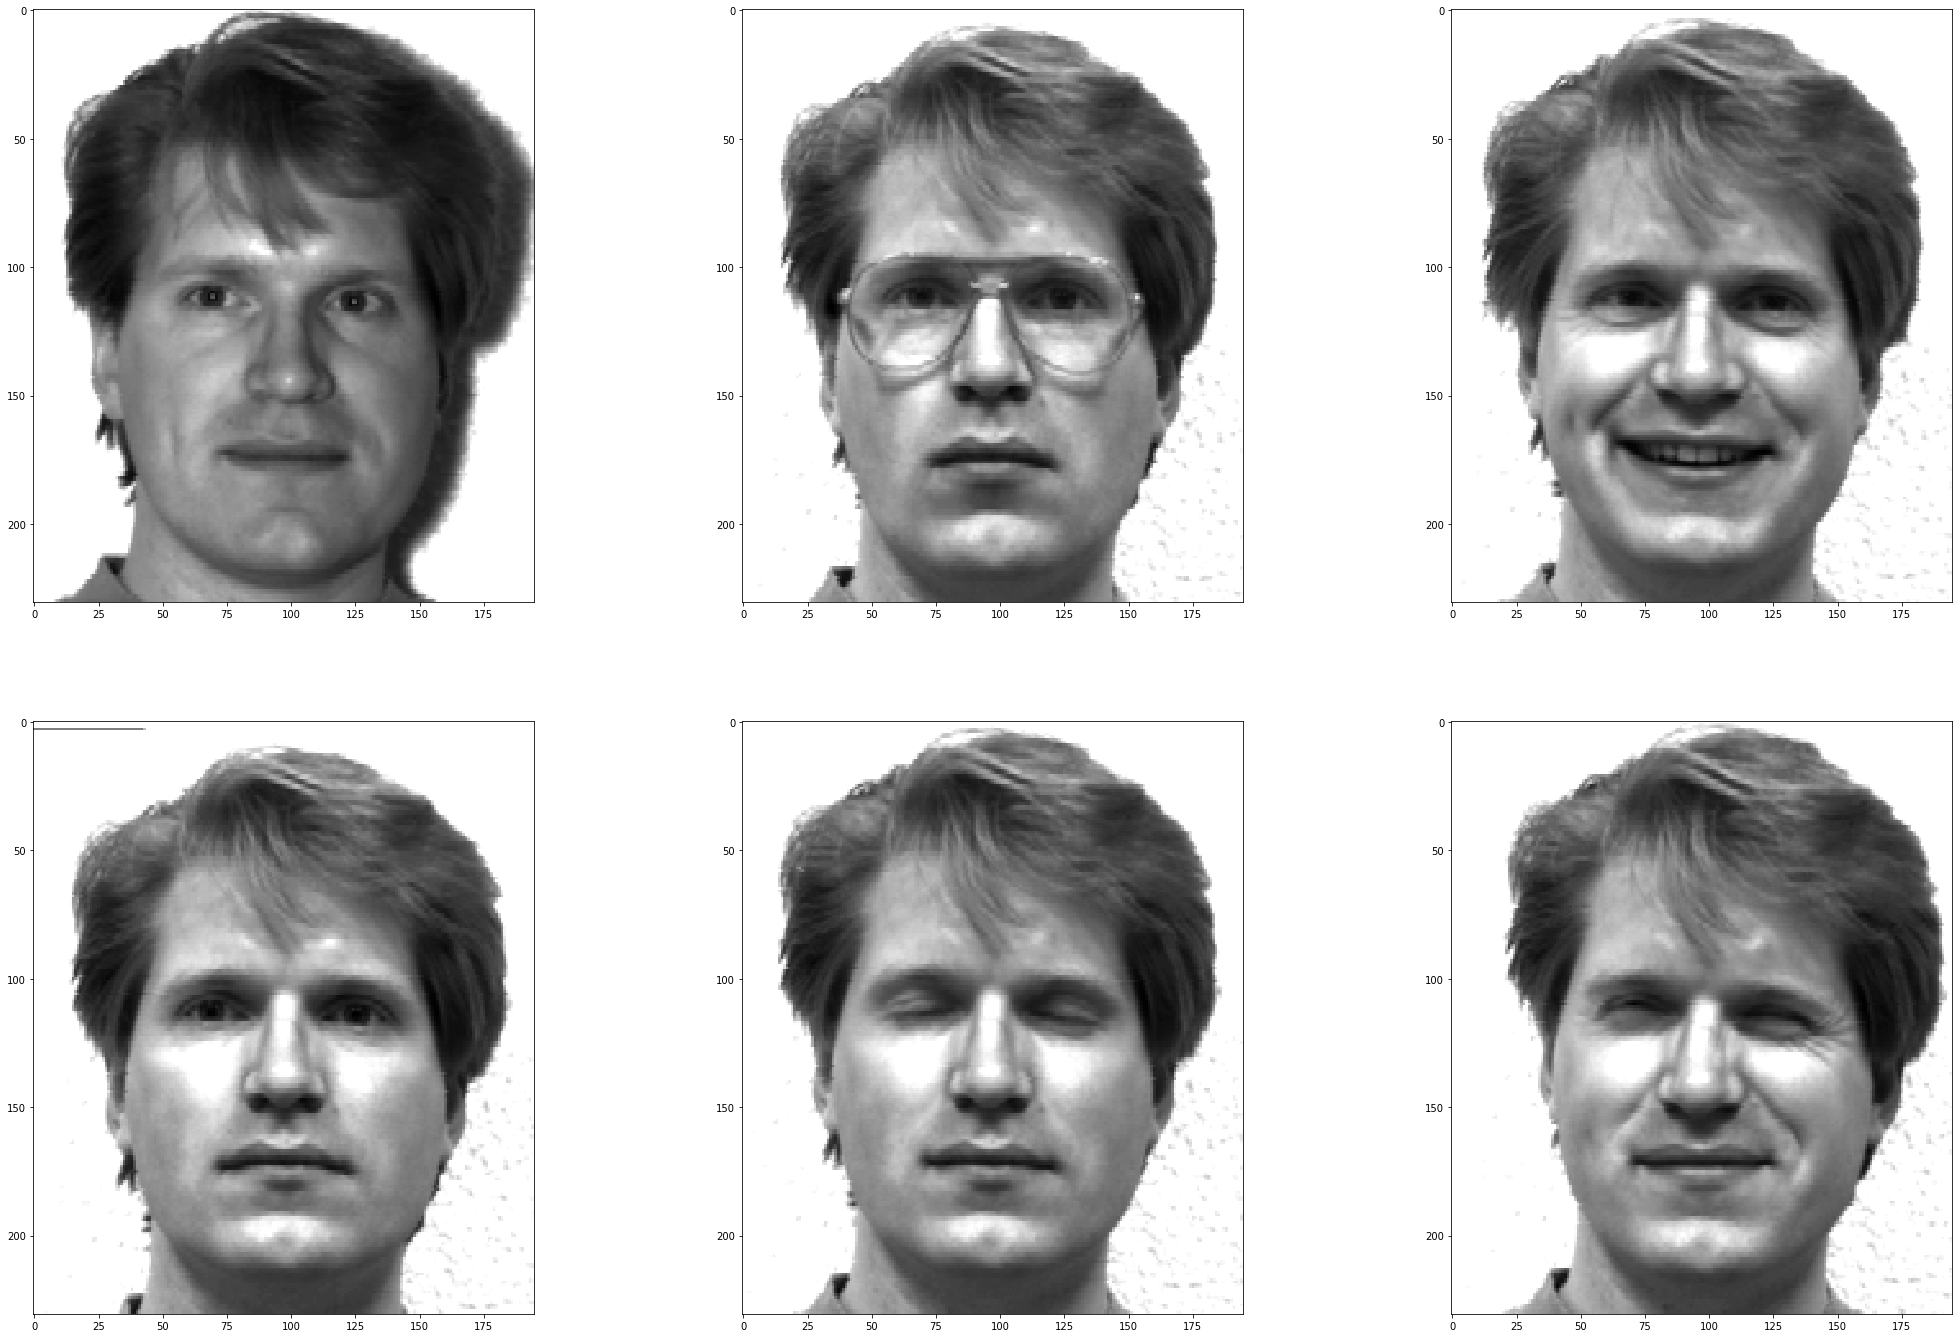

In [23]:
queryHashing(images[0],images,hash_tree,image_dict,6)